In [29]:
from cmath import *
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def A(r1, r2, d):
    if d == 0:
        r = min(r1, r2)
        return pi * r ** 2

    t1 = r1 ** 2 * acos((d ** 2 + r1 ** 2 - r2 ** 2) / (2 * d * r1))
    t2 = r2 ** 2 * acos((d ** 2 - r1 ** 2 + r2 ** 2) / (2 * d * r2))
    t3 = sqrt((-d + r1 + r2) * (d + r1 - r2) * (d - r1 + r2) * (d + r1 + r2))
    return (t1 + t2 - t3 / 2).real

def annular_overlap(r_outer, r_inner, d):
    return A(r_outer, r_outer, d)- 2 * A(r_outer, r_inner, d) + A(r_inner, r_inner, d)

Text(0, 0.5, 'fraction blended')

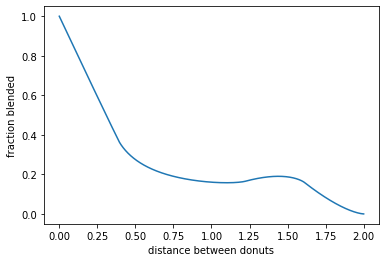

In [92]:
d = np.linspace(0, 2, 100000)
overlap = np.array([annular_overlap(1, 0.61, D) for D in d])
f = overlap / annular_overlap(1, 0.61, 0)
plt.plot(d, f)
plt.xlabel("distance between donuts")
plt.ylabel("fraction blended")

Text(0, 0.5, 'p(fraction blended)')

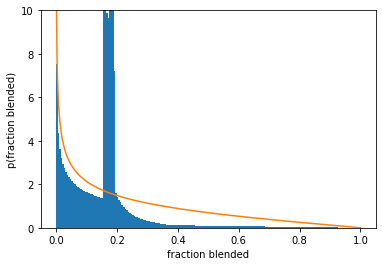

In [97]:
plt.hist(f, weights=2*pi*d, bins=200, density=True)


overlap2 = np.array([A(1, 1, D) for D in d])
f2 = overlap2 / pi
plt.plot(f2, 2*d*np.abs(np.gradient(d, f2))/4)
#plt.hist(f2, weights=2*pi*d, bins=200, density=True, histtype="step")


plt.ylim(0, 10)
plt.xlabel("fraction blended")
plt.ylabel("p(fraction blended)")